In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import anndata as ad
import os

In [2]:
adata = scv.datasets.gastrulation_erythroid()

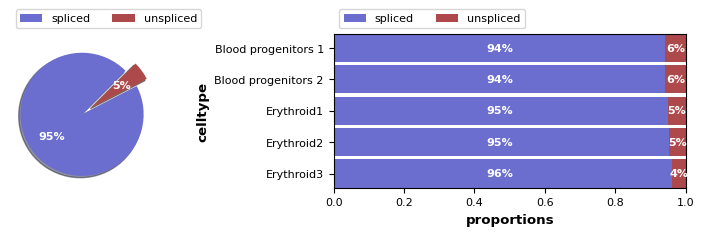

In [3]:
scv.pl.proportions(adata, groupby = "celltype")

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes = 2000)
scv.pp.moments(adata, n_pcs = 50, n_neighbors = 50)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
sc.tl.leiden(adata)

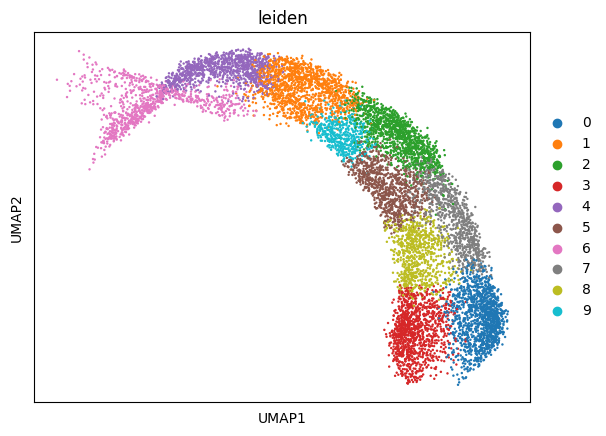

In [6]:
sc.pl.umap(adata, color = "leiden")

In [7]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == '6')[0]

In [8]:
sc.tl.dpt(adata)

In [9]:
adata

AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors', 'leiden', 'leiden_colors', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [10]:
adata.write_h5ad("data/JuloVelo_pre.h5ad")